# Importing libraries and reading dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading dataset

df = pd.read_csv(r'C:\Users\User\Desktop\employee.csv')

In [2]:
# Displaying first 5 rows

df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [10]:
# Concise summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


## **Insight :  As we can see there are missing values in age, gender and income features**

In [3]:
# Statistical Summary

df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [5]:
# Making 'name' as the index

df = df.set_index('name')
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [6]:
# Displaying rows for specific names like Jack Morgan and Josh wills

df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [8]:
# Displaying data for multiple values like "Sales" and “Finance”.

df.loc[(df['department'] =='Sales' ) | (df['department'] =='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [10]:
# Displaying employees who has more than 700 performance score

df.loc[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [11]:
# Displaying employee who has more than 500 and less than 700 performance score

df.loc[(df['performance_score']<700 ) & (df['performance_score']>500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [14]:
# Filling values for 'age', 'income' and 'gender'

df['age'] = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9 non-null      float64
 1   income             9 non-null      float64
 2   gender             9 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


In [16]:
# Checking for null values

df.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## **Insight : As we can see there are no more missing values**

In [17]:
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


{'whiskers': [<matplotlib.lines.Line2D at 0x1729c0403d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1729c0409d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1729c031fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1729c04d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1729c04d460>],
 'means': []}

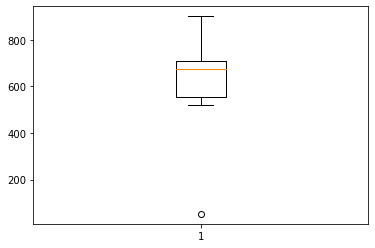

In [18]:
#  Outliers and handle outliers in performance score using Percentiles

plt.boxplot(df['performance_score'])

## **Insight : There are outliers present in the performance score feature**

In [19]:
# Calculating percentiles

q1 = np.percentile(df['performance_score'],25, interpolation = "midpoint")
q2 = np.percentile(df['performance_score'],50, interpolation = "midpoint")
q3 = np.percentile(df['performance_score'],75, interpolation = "midpoint")

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2}".format(q1,q2,q3))

 Q1 = 556.0 
 Q2 = 674.0 
 Q3 = 711.0


In [22]:
# Calculating inter quartile range as well as the upper and lower limit of outliers

IQR=q3-q1
print('IQR = ',IQR)

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

IQR =  155.0
Upper limit =  943.5 
Lower limit =  323.5


In [24]:
# Creating a list of outliers

outlier = []

for i in df['performance_score']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
        
print(outlier)

[53]


## ** Insight : There is one outlier present

In [27]:
# Finding index values of outliers

indx = df['performance_score']<low_lim
df.loc[indx].index

Index(['James Authur'], dtype='object', name='name')

In [29]:
# Dropping outliers

df.drop(['James Authur'],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1729c0a1d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1729c0b0490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1729c0a1970>],
 'medians': [<matplotlib.lines.Line2D at 0x1729c0b0bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1729c0b0f40>],
 'means': []}

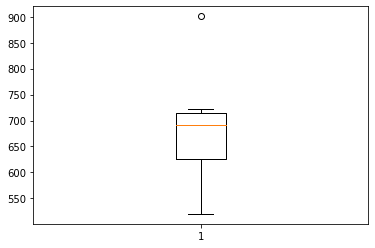

In [31]:
# Boxplot after removal of outliers

plt.boxplot(df['performance_score'])

In [32]:
# Dummy encoding of gender feature

df_encoded=pd.get_dummies(df, columns=['gender'])
df_encoded

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


In [33]:
# Standard scaling on the feature 'performance score'

df[['performance_score']]

,performance_score
name,
Allen Smith,723
S Kumar,520
Jack Morgan,674
Ying Chin,556
Dheeraj Patel,711
Satyam Sharma,649
Josh Wills,901
Leo Duck,709


In [34]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
df[['performance_score']]=standardisation.fit_transform(df[['performance_score']])
df[['performance_score']]=pd.DataFrame(df[['performance_score']])
df[['performance_score']]

,performance_score
name,
Allen Smith,0.392262
S Kumar,-1.475872
Jack Morgan,-0.058667
Ying Chin,-1.144578
Dheeraj Patel,0.281831
Satyam Sharma,-0.288733
Josh Wills,2.030331
Leo Duck,0.263425
